## Titanic - Exploration 
In this notebook, we will see the basic data exploration of the Titanic dataset 

In [1]:
# importing the necessary packages #
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from matplotlib import pyplot as plt
%matplotlib inline

# Basic Understanding

In [2]:
# reading the train file and saving it as a pandas data frame #
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

Date Frame - Heterogeneous List of array of same number of elements. Easy to store and acess excel sheet kind of data. 

In [3]:
# name of the columns #
train_df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [5]:
# Print the values in Names 
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [6]:
# No of rows containing Age
train_df['Age'].count()

714

In [5]:
# Distribution of Age in the DataFrame
train_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
19.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
23.00    15
34.00    15
33.00    15
20.00    15
39.00    14
17.00    13
40.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
28.50     2
40.50     2
63.00     2
13.00     2
10.00     2
45.50     2
70.00     2
30.50     2
71.00     2
59.00     2
57.00     2
55.00     2
0.75      2
64.00     2
23.50     1
14.50     1
0.67      1
53.00     1
0.92      1
0.42      1
70.50     1
36.50     1
80.00     1
66.00     1
74.00     1
12.00     1
55.50     1
34.50     1
24.50     1
20.50     1
Name: Age, dtype: int64

In [7]:
## Summary of Age
print train_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [8]:
# dimensions of the input data (number of rows and columns) #
print "Train dataframe shape is : ", train_df.shape
print "Test dataframe shape is : ", test_df.shape

Train dataframe shape is :  (891, 12)
Test dataframe shape is :  (418, 11)


In [9]:
# taking a look at the first few rows #
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [10]:
# getting the summary statistics of the numerical columns #
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# getting the datatypes of the individual columns #
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# more information about the dataset #
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


So, there are 891 rows in train set and 418 rows in test set. Also as we can see, most of the columns are not null. There are few columns which have null values as well. They are:
 1. Age
 2. Cabin
 3. Embarked
 4. Cabin
 
Out of this, 'Cabin' variable is Null for most part of the rows. So it is better to remove the 'Cabin' variable for model building.

In [14]:
# dropping the cabin variable #
train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

# Basic Visualization

## Univariate Plots 

Now we will try to plot the given variables to see how they are distributed. 

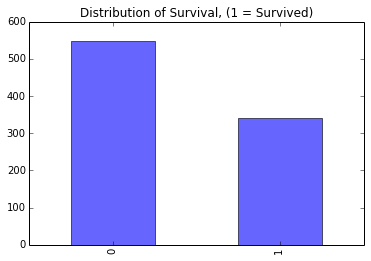

In [15]:
# let us get some plots to see the data #
train_df.Survived.value_counts().plot(kind='bar', alpha=0.6)
plt.title("Distribution of Survival, (1 = Survived)")

In [16]:
train_df[train_df.Survived==0].count()

PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            424
SibSp          549
Parch          549
Ticket         549
Fare           549
Embarked       549
dtype: int64

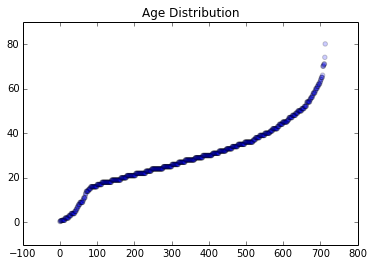

In [17]:
# scatter plot between survived and age #
plt.scatter(range(train_df.shape[0]), np.sort(train_df.Age), alpha=0.2)
plt.title("Age Distribution")

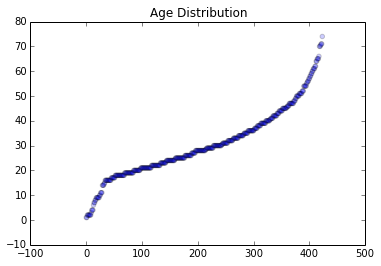

In [18]:
# scatter plot between survived and age #
plt.scatter(range(train_df[(train_df.Survived==0)].shape[0]), np.sort(train_df[train_df.Survived==0].Age), alpha=0.2)
plt.title("Age Distribution")

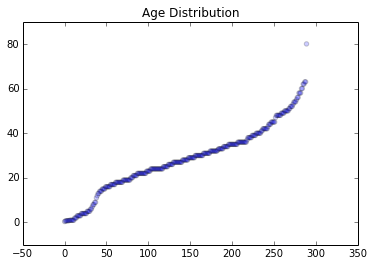

In [19]:
# scatter plot between survived and age #
plt.scatter(range(train_df[(train_df.Survived==1)].shape[0]), np.sort(train_df[train_df.Survived==1].Age), alpha=0.2)
plt.title("Age Distribution")

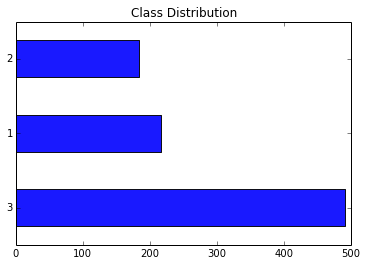

In [20]:
train_df.Pclass.value_counts().plot(kind="barh", alpha=0.9)
plt.title("Class Distribution")

##### TO DO:
1. Create a bar graph for the variable 'Embarked'.
2. Create a scatter plot for varibale 'fare' and check how it is distributed.

## Plots with respect to Survival
Now we will make plots with Survival to understand the relationship of the variables with DV

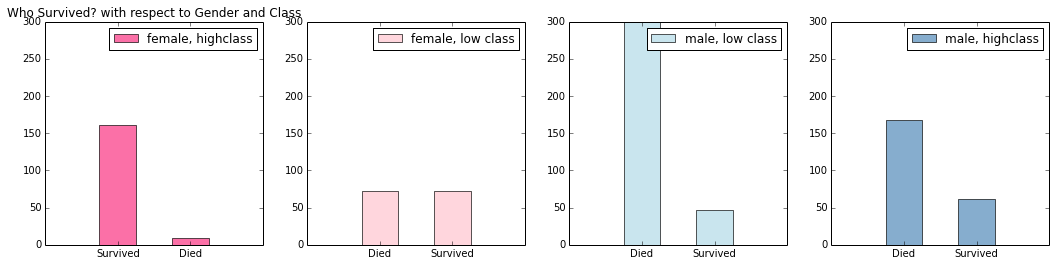

In [25]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65



ax1=fig.add_subplot(141)
female_highclass = train_df.Survived[train_df.Sex == 'female'][train_df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = train_df.Survived[train_df.Sex == 'female'][train_df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = train_df.Survived[train_df.Sex == 'male'][train_df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = train_df.Survived[train_df.Sex == 'male'][train_df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [ ]:
Notice that richer women have higher change of survi

#### TO DO:
1. Plot a bar graph between DV and Pclass to see how the survival is distributed between the classes
2. Draw and "Box and Whisker plot" between survival and age and see the distribution between age and DV

## Supervised Machine Learning
### Logistic Regression

Our competition wants us to predict a binary outcome. That is, it wants to know whether some will die, (represented as a 0), or survive, (represented as 1).

Logistic Regression is a method to solve these kind of problems. Please read about logistic regression to have a deeper understanding.

In [20]:
# getting the necessary columns for building the model #
train_X = train_df[["Pclass", "SibSp", "Parch", "Fare"]]
train_y = train_df["Survived"]
test_X = test_df[["Pclass", "SibSp", "Parch", "Fare"]]

### Cross Validation

If we build models on the whole train dataset, how do we know the performance on the model on a new dataset?? 

So what we can instead do is to build the model on a part fo the dataset and then test it on the other part so that we get an idea of how our model performs on a new data. This process is known as Model Validation in Machine Learning field.

So now let us split the train data into two parts
1. Developement sample
2. Validation Sample

In [21]:
# split the train data into two samples #
dev_X, val_X, dev_y, val_y = train_test_split(train_X, train_y, test_size=0.33, random_state=42)

# Build the machine learning model - in this case, logistic regression #
# Initialize the model #
clf = lm.LogisticRegression()

# Build the model on development sample #
clf.fit(dev_X, dev_y)

# Predict on the validation sample #
val_preds = clf.predict(val_X)
print val_preds[:10]

[0 0 0 0 0 1 0 0 0 1]


So we got the validation sample classes as prediction outputs. Now it is time to check the performance of our model. We have our validation sample predictions and we have the validation sample true labels with us. 

Let us compute the accuracy then.!

In [22]:
# import the function that computes the accuracy score #
from sklearn.metrics import accuracy_score

accuracy_score(val_y, val_preds)

0.70847457627118648

We can also compute other evaluation metrics like precision, recall etc.

We got the actual classes as outputs from our model. Instead if we need class probabilities, we can do the following

In [23]:
val_preds = clf.predict_proba(val_X)
print val_preds[:10]

[[ 0.72392064  0.27607936]
 [ 0.61739343  0.38260657]
 [ 0.74565568  0.25434432]
 [ 0.52349124  0.47650876]
 [ 0.7750273   0.2249727 ]
 [ 0.37396789  0.62603211]
 [ 0.74585577  0.25414423]
 [ 0.79859062  0.20140938]
 [ 0.74585577  0.25414423]
 [ 0.33274691  0.66725309]]


In [24]:
val_preds_all=[x[0] for x in val_preds]

In [25]:
def threshold(threshold):
    val_preds_threshold = []
    for x in val_preds_all:
        if x > threshold:
            val_preds_threshold.append(False)
        else:
            val_preds_threshold.append(True)
    return accuracy_score(val_y, val_preds_threshold)        
    

In [26]:
range_iteration = range(0,10,1)
for i in range_iteration:
    j = float(i)/10
    print j,"-",threshold(j)

0.0 - 0.593220338983
0.1 - 0.593220338983
0.2 - 0.603389830508
0.3 - 0.616949152542
0.4 - 0.657627118644
0.5 - 0.708474576271
0.6 - 0.718644067797
0.7 - 0.664406779661
0.8 - 0.410169491525
0.9 - 0.406779661017


In [27]:
clf = LinearSVC()

# Build the model on development sample #
clf.fit(dev_X, dev_y)

# Predict on the validation sample #
val_preds = clf.predict(val_X)
accuracy_score(val_y, val_preds)

0.69830508474576269

In [28]:
clf = SVC()

# Build the model on development sample #
clf.fit(dev_X, dev_y)

# Predict on the validation sample #
val_preds = clf.predict(val_X)
accuracy_score(val_y, val_preds)

0.73220338983050848

In [45]:
gamma_range = np.logspace(-9, 3, 13)
C_range = np.logspace(-2, 10, 13)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1]:
parameter= {"C":  np.logspace(-2, 10, 13)}
grid_search = GridSearchCV(SVC(), param_grid=parameter)
print grid_search.fit(train_X,train_y)

NameError: name 'np' is not defined

In [101]:
grid_search.best_params_

{'gamma': 0.01}

In [48]:
clf = SVC()

# Build the model on development sample #
clf.fit(dev_X, dev_y)

# Predict on the validation sample #
val_preds = clf.predict(val_X)
accuracy_score(val_y, val_preds)

0.73220338983050848